In [1]:
import gc
import math
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import scipy.stats as st
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN, OPTICS

import helpers as hp
import clustering as cl
import display as dp
import importlib #importlib.reload(foo)

In [2]:
MDIR = '/sanssauvegarde/homes/v18porti/info/'

In [6]:
df_ALL = pd.read_feather(MDIR + '550_32.feather')
print(df_ALL.shape)
df_ALL.info()

(120128063, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120128063 entries, 0 to 120128062
Data columns (total 4 columns):
vectorRRKLD_ALL       float32
vectorFAmpKLD_ALL     float32
vectorUFAmpKLD_ALL    float32
vectorCorrKLD_ALL     float32
dtypes: float32(4)
memory usage: 1.8 GB


In [7]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.16)
del df_ALL; gc.collect();
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')

#df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
#df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes)
df_nout, Xnorm, std, indexes2 = cl.runOutNormV2(df_DIV, indexes)

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del df_nout; gc.collect();


------------- shape: (19220490, 4) -----------------
 


KeyboardInterrupt: 

In [ ]:
n_components_range = range(6, 12)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

gmm weights: [9.66253998e-01 7.57480384e-07 1.48813485e-02 1.88638964e-02]
bic value: 9019629.376360876
gmm weights: [1.47099284e-02 1.86940690e-04 2.91865394e-02 9.55915834e-01
 7.57480384e-07]
bic value: 2939990.521517434
gmm weights: [9.55282041e-01 2.92035261e-02 2.18484540e-05 7.57480384e-07
 1.30466310e-02 2.44519625e-03]
bic value: 2144322.7234603376


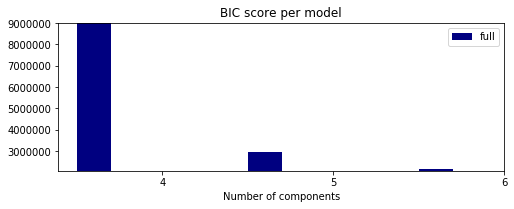

In [8]:
n_components_range = range(4, 7)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

gmm weights: [9.53266984e-01 7.57480384e-07 2.87647356e-02 2.71764641e-03
 2.31813185e-05 2.46322226e-03 1.27634731e-02]
bic value: 1466741.3044896936
gmm weights: [2.86583718e-02 9.53214268e-01 7.57480384e-07 2.75753965e-03
 8.48778359e-06 2.62070031e-03 1.81741916e-05 1.27217010e-02]
bic value: 1452369.1242476068
gmm weights: [9.47371330e-01 1.60623344e-05 7.57480384e-07 1.11649877e-02
 1.92029831e-03 2.49613370e-02 1.34521236e-02 6.87738213e-06
 1.10622568e-03]
bic value: 562540.326631073
gmm weights: [2.48635807e-02 7.57480384e-07 8.04607240e-06 4.35018465e-04
 1.10590838e-03 1.11750201e-02 1.40510952e-02 1.34195260e-04
 9.47538454e-01 6.87924212e-04]
bic value: 598428.2631094732
gmm weights: [9.46954135e-01 7.57480384e-07 7.13708315e-06 1.10844459e-03
 1.40116228e-02 1.09851371e-02 4.31668617e-04 3.01198559e-05
 2.56123031e-02 6.71756314e-04 1.86917992e-04]
bic value: 515839.78132566245


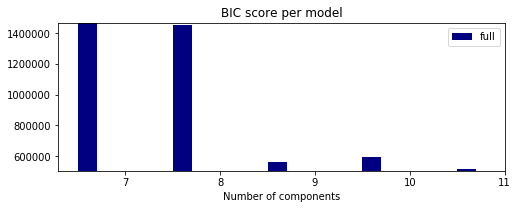

In [7]:
n_components_range = range(7, 12)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

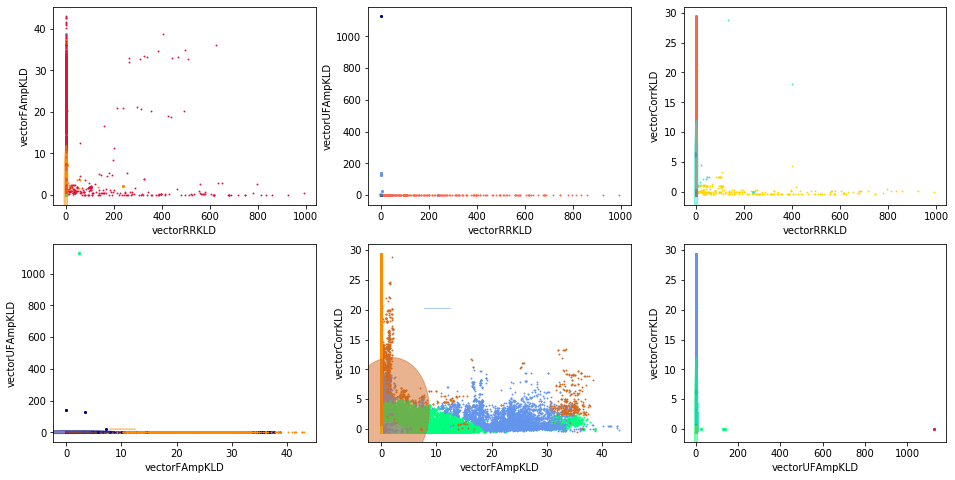

In [5]:
gmm = GaussianMixture(n_components=9, covariance_type='full').fit(Xnorm)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.printPCAGMM(gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [6]:
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

[6.15302258e-02 7.57480384e-07 9.75886557e-03 3.19452878e-04
 1.52110771e-01 3.16750569e-02 2.03918702e-04 2.73901055e-02
 7.17010846e-01]
[[-2.34317229e-03 -4.64670840e-02 -4.48838304e-03 -2.57587058e-01]
 [-2.34303781e-03  2.31820438e+00  1.12862137e+03  1.82544805e-02]
 [-2.34317712e-03  6.20108605e+00  3.81132966e-01  1.88441249e-01]
 [ 8.15446897e-01  2.00755058e+00  1.42403110e+00  6.85588485e+00]
 [-2.34317671e-03 -9.55504302e-02 -7.91230712e-03  3.75462989e-01]
 [-2.34317720e-03  7.17855027e-01  7.39471825e-02 -7.58086586e-02]
 [ 1.02071288e+01  2.02077073e+01  1.79798387e+00  1.81846456e+00]
 [-2.34211060e-03 -9.27113566e-02 -3.25584756e-03  3.76291569e+00]
 [-2.34317728e-03 -9.49563232e-02 -8.60415456e-03 -2.04080492e-01]]
[[[ 1.00000022e-06 -2.06538783e-11 -1.72852684e-12 -4.22616466e-10]
  [-2.06538783e-11  2.54890638e-03  2.27536187e-04  4.32727647e-04]
  [-1.72852684e-12  2.27536187e-04  2.16290662e-05  5.20191911e-05]
  [-4.22616466e-10  4.32727647e-04  5.20191911e-05  3

In [4]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.16)
del df_ALL; gc.collect();
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')

df_nout, Xnorm, Xpca, dfPca, titPca, pca, std, indexes2 = cl.runOutNormPCAV2(df_DIV, indexes, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
#df_nout, Xnorm, std, indexes2 = cl.runOutNorm(df_DIV, indexes)

if printPCA: dp.printPCAScatter(df_nout, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])
del Xnorm, df_nout, dfPca; gc.collect();


------------- shape: (19220490, 4) -----------------
 
bandwidth: 4573760504758821.0
number of estimated clusters : 400
shapes: (19220490,), (19220490, 4)
shapes: (19218600,), (19218600, 4)
tomain [ True  True  True ...  True  True  True]
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (19201460, 4) && 99.9
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (19218600, 4) && 99.99
variance ratio: [0.26041458 0.24993775 0.24988699 0.23976069]


gmm weights: [9.55558418e-01 7.81190597e-07 2.96092368e-02 1.93239993e-04
 1.46383241e-02]
bic value: 2494122.1436058693
gmm weights: [9.53545376e-01 7.81190597e-07 2.89143795e-02 1.46260180e-02
 2.71958877e-03 1.93856417e-04]
bic value: 2013264.061523153
gmm weights: [9.54919961e-01 7.81190597e-07 9.39754772e-06 2.80888274e-03
 2.96244240e-02 1.81287767e-05 1.26184248e-02]
bic value: 1890668.4763316244
gmm weights: [9.48395423e-01 8.59042172e-06 7.81190597e-07 1.22114693e-02
 1.42442061e-02 2.38782421e-02 2.18335732e-04 1.04295170e-03]
bic value: 1322225.9327392443
gmm weights: [9.46321684e-01 2.07688859e-03 7.81190597e-07 7.27197901e-06
 1.04659011e-03 1.13477761e-02 1.32227742e-02 2.59593607e-02
 1.68732115e-05]
bic value: 740936.3209539138
gmm weights: [9.45084631e-01 6.55564380e-06 7.81190597e-07 1.13083003e-02
 6.75523857e-04 1.04097438e-03 1.23374650e-04 1.39247539e-02
 2.73722813e-02 4.62823858e-04]
bic value: 762359.3856132319
gmm weights: [9.43782511e-01 7.81190597e-07 1.1879

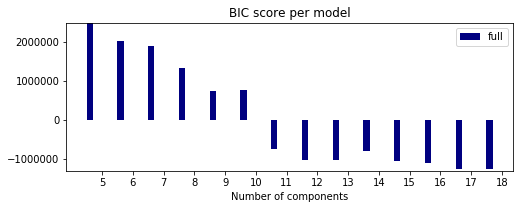

In [5]:
n_components_range = range(5, 19)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xpca, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

gmm weights: [9.55556699e-01 1.93373449e-04 7.81190597e-07 1.46382398e-02
 2.96109069e-02]
bic value: 2492875.639948533
gmm weights: [9.54910504e-01 1.24875724e-02 2.47538336e-05 7.81190597e-07
 2.96267241e-02 2.94966414e-03]
bic value: 1883299.9964790915
gmm weights: [9.48860854e-01 7.81190597e-07 2.70192691e-04 1.10011582e-02
 1.59781986e-02 2.38108165e-02 7.79986969e-05]
bic value: 282708.6558055565
gmm weights: [9.48566109e-01 7.81190597e-07 1.14109540e-05 7.83542143e-05
 1.06086038e-02 6.68425127e-04 1.57071415e-02 2.43591745e-02]
bic value: 139680.66957444628
gmm weights: [2.59793737e-02 7.81190597e-07 7.26936346e-06 9.46293641e-01
 2.07718057e-03 1.13558531e-02 1.32223349e-02 1.04667123e-03
 1.68949997e-05]
bic value: 738182.9757073274
gmm weights: [9.43900540e-01 7.81190597e-07 1.08446080e-02 1.50767578e-05
 1.76075172e-03 8.45624448e-06 2.63974978e-02 8.98082936e-04
 1.51145784e-02 1.05962686e-03]
bic value: -766451.4093584487
gmm weights: [9.28030899e-01 8.55034422e-06 7.8119

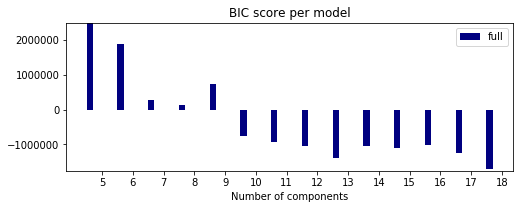

In [8]:
n_components_range = range(5, 19)
best_gmm, bic, cv_types = cl.getBestGMMUsingAIC(Xpca, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

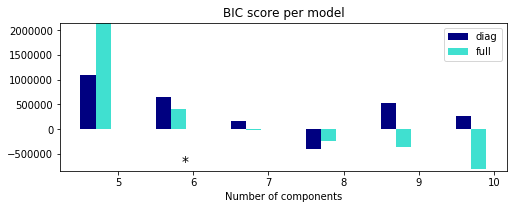

In [5]:
n_components_range = range(5, 11)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['diag', 'full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

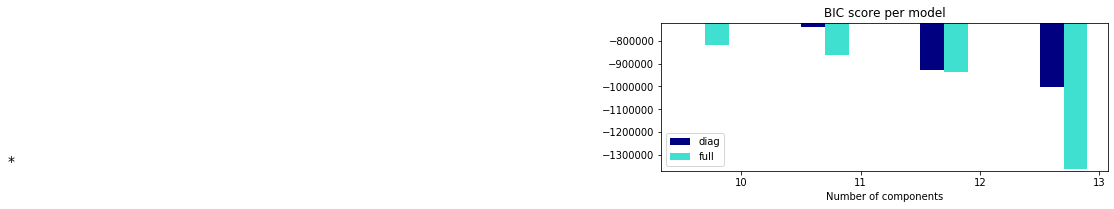

In [6]:
n_components_range = range(10, 14)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['diag', 'full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [7]:
bic

array([ -719990.15429582,  -740311.62329736,  -929396.26200011,
       -1004947.08440628,  -819803.89486056,  -861535.00205789,
        -935618.92081424, -1365168.02918165])

[9.52324772e-01 1.49958371e-04 1.24985809e-06 1.61982529e-02
 2.87063370e-02 2.61942994e-03]
[9.52688887e-01 3.13978383e-03 1.24985809e-06 2.59075568e-05
 2.86627917e-03 2.87020480e-02 1.25758442e-02]
[9.48422447e-01 1.24985809e-06 2.88032450e-04 2.36852619e-02
 4.21458187e-04 1.09057886e-02 6.93583455e-05 1.62064032e-02]
[9.46499027e-01 1.24985809e-06 5.93379126e-06 1.07627851e-03
 1.96268074e-03 2.57149295e-02 1.78840971e-05 1.36269344e-02
 1.10950820e-02]
[2.26652792e-02 1.24985809e-06 1.75558686e-05 4.19373689e-04
 1.12800157e-02 9.47358564e-01 1.60486791e-02 1.04611069e-03
 1.09404869e-03 6.91227382e-05]
[8.59118074e-01 1.24985809e-06 7.03896839e-06 2.20411804e-03
 1.34166589e-02 4.72230845e-03 1.74442692e-02 1.77190004e-05
 9.50196662e-02 1.03335577e-03 7.01554170e-03]
[9.25633029e-01 1.24985809e-06 5.97958426e-04 1.32845463e-05
 7.90737611e-03 1.54573511e-03 8.55186860e-03 3.91263771e-02
 1.74115429e-04 4.36297918e-04 1.06793939e-03 1.49447686e-02]
[9.17392754e-01 1.24985809e-06

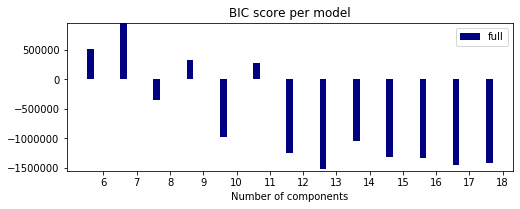

In [5]:
n_components_range = range(6, 19)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

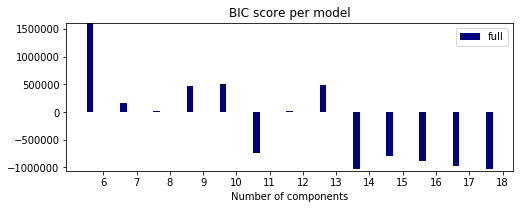

In [5]:
n_components_range = range(6, 19)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xnorm, n_components_range, ['full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [6]:
bic

array([ 1611933.8566924 ,   159095.65591262,    15258.75712495,
         470622.9661747 ,   509634.29528785,  -741128.75858292,
          11433.71889007,   478848.28063008, -1020878.0952448 ,
        -797254.03994361,  -880809.06274092,  -981159.37232819,
       -1033267.17616104])

In [7]:
best_gmm.weights_

array([2.36017440e-02, 1.27764703e-06, 2.15865454e-01, 5.26393936e-04,
       2.26943290e-07, 2.88700226e-03, 5.55498710e-08, 1.21536341e-02,
       5.42153337e-03, 4.29392763e-03, 2.15460554e-04, 9.51908985e-04,
       6.15864460e-03, 7.27463038e-01, 1.41802760e-05, 2.11089510e-06,
       4.43295843e-04, 1.11099742e-07])

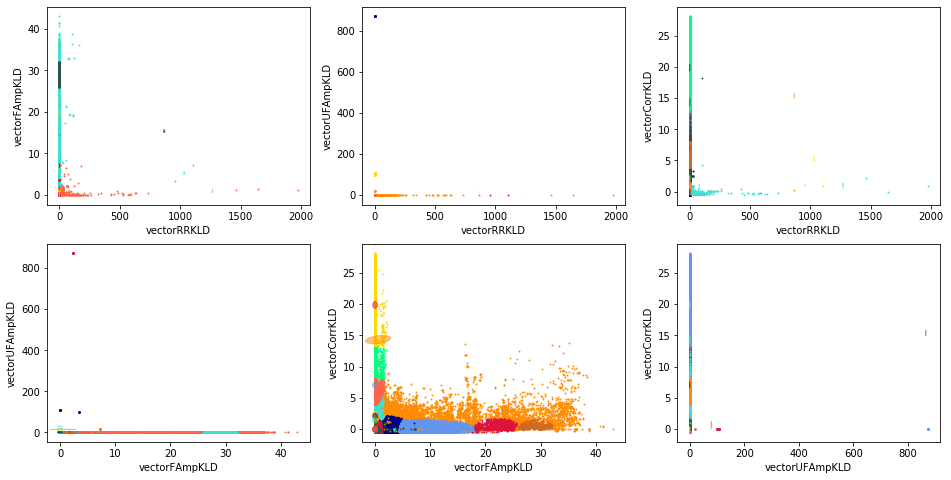

In [8]:
dp.printPCAGMM(best_gmm, Xnorm, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'], color_iter)

In [7]:
importlib.reload(cl)
importlib.reload(dp)

<module 'display' from '/homes/v18porti/Documents/code/imt_stg/display.py'>


------------- shape: (18019209, 4) -----------------
 
number of estimated clusters : 979
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (18002224, 4) && 99.91
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (18017440, 4) && 99.99
variance ratio: [0.25882292 0.24996043 0.24986407 0.24135258]


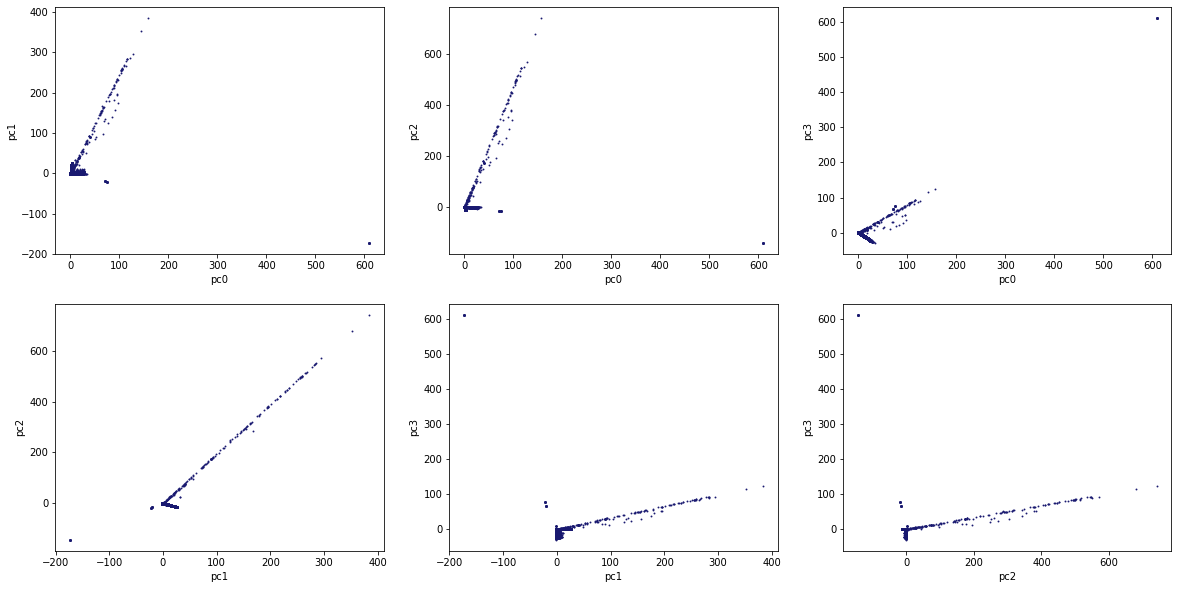

10676

In [4]:
df_DIV, indexes = hp.getRandomRows(df_ALL, 0.15)
del df_ALL; gc.collect()
printPCA = True
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
"""UFAMP_limit = 1e+6
threshold = 20
RRKLD_limit = pow(10, 4*(0+1)) * 2"""
#print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')

df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCAV2(df_DIV, threshold=20, threshold_hard=0.01, cols_hard=[0,2])
del df_nout, Xnorm ; gc.collect()
if printPCA: dp.printPCAScatter(dfPca, titPca)
del dfPca; gc.collect()

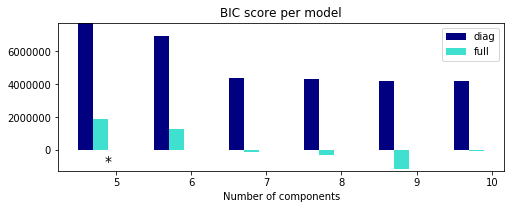

In [5]:
n_components_range = range(5, 11)
best_gmm, bic, cv_types = cl.getBestGMMUsingBIC(Xpca, n_components_range, ['diag', 'full'], 0.1)
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])
dp.plotBICScores(bic, cv_types, color_iter, n_components_range)

In [6]:
bic

array([ 7758198.2976514 ,  6944439.57676849,  4371034.2161367 ,
        4297206.72526011,  4217522.14168662,  4179913.91254712,
        1851571.21051322,  1290607.24131926,  -163573.40607203,
        -299921.8270233 , -1194603.60762218,   -46038.90218533])

In [1]:
importlib.reload(cl)


NameError: name 'importlib' is not defined

In [4]:
df_DIV = hp.getRandomRows(df_ALL, 0.20)
del df_ALL; gc.collect()
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')




------------- shape: (24025612, 4) -----------------
 


In [27]:
def getImportance(col, center, bandwidth):
    return np.where(np.logical_and(center - bandwidth <=col , col<= center + bandwidth))[0].shape[0]

def getBeforeCenter(main, n):
    t = (main < n)
    i = [ j for j, b in enumerate(t) if b ]
    v = main[t]
    return v[-1]

def removeOuliersFromMeanShift(cols, X, threshold, cluster_centers, bandwidth):
    total = X.shape[0]
    indexes = []
    for col in cols:
        centers = cluster_centers[:, col]
        centers.sort()
        print('centers', centers)
        importance = [ getImportance(X[:, col], c, bandwidth) for c in centers ]
        print('importance', importance)
        #z = np.abs(st.zscore(importance))
        z = np.array([ v / total for i, v in enumerate(importance) ])
        print('to maintain', np.where(z > threshold))
        to_remove_centers = centers[(z <= threshold)]
        extremes = [ to_remove_centers[0] - bandwidth, to_remove_centers[-1] + bandwidth ]
        print('extremes', extremes) 
        removing_indexes = np.where(np.logical_and(X[:, col]>=extremes[0], X[:, col]<=extremes[1]))[0]
        print('to remove', removing_indexes)
        indexes = np.concatenate((indexes, removing_indexes))
    to_remove = np.unique(indexes).astype(np.int32)
    return np.delete(X, to_remove, 0)

def removeOuliersFromMeanShiftV2(cols, X, threshold, cluster_centers, bandwidth):
    total = X.shape[0]
    indexes = []
    for col in cols:
        centers = cluster_centers[:, col]
        centers.sort()
        #print('centers', centers)
        importance = [ getImportance(X[:, col], c, bandwidth) for c in centers ]
        #print('importance', importance)
        #z = np.abs(st.zscore(importance))
        z = np.array([ v / total for i, v in enumerate(importance) ])
        #print('z', z)
        #print('to maintain', np.where(z > threshold))
        to_remove_centers = centers[(z <= threshold)] # they are always the last centers
        before_first_center = getBeforeCenter(centers, to_remove_centers[0])
        #print(before_first_center)
        to_remove_centers = np.insert(to_remove_centers, 0, before_first_center) 
        #print('to_remove_centers', to_remove_centers)
        extremes = [ to_remove_centers[0], to_remove_centers[-1] + bandwidth ]
        #print('extremes', extremes) 
        removing_indexes = np.where(np.logical_and(extremes[0]<=X[:, col], X[:, col]<=extremes[1]))[0]
        #print('to remove', removing_indexes)
        indexes = np.concatenate((indexes, removing_indexes))
        #print('indexes', indexes)
    to_remove = np.unique(indexes).astype(np.int32)
    return np.delete(X, to_remove, 0)

In [6]:
X = df_DIV.to_numpy().astype(np.float64)

In [7]:

bandwidth = estimate_bandwidth(X, n_samples=50000, quantile=0.5)
ms, n_clusters_, cluster_centers, labels = cl.meanClustering(X, bandwidth)

number of estimated clusters : 856


In [31]:
bandwidth

1026196974464030.2

In [28]:
X_new1 = removeOuliersFromMeanShiftV2([2], X, 0.01, cluster_centers, bandwidth)

centers [5.48010025e+01 5.55399323e+01 5.58804893e+01 5.76318512e+01
 6.06364670e+01 6.56749573e+01 6.62323685e+01 6.93264275e+01
 7.21523590e+01 7.30278931e+01 7.66054382e+01 7.78533859e+01
 7.81756668e+01 8.56918869e+01 8.89790459e+01 8.94694824e+01
 9.00018845e+01 9.03810883e+01 9.15814514e+01 9.20451813e+01
 9.98583984e+01 1.00007042e+02 1.08873199e+02 1.14894192e+02
 1.15112576e+02 1.29839149e+02 1.39281815e+02 1.66721630e+02
 1.76750671e+02 1.89313766e+02 1.90637466e+02 2.09856186e+02
 2.17312286e+02 2.22078217e+02 2.22732315e+02 2.45411209e+02
 2.59644440e+02 2.70494629e+02 2.72505646e+02 2.90400097e+02
 2.93233078e+02 3.05152985e+02 3.20727051e+02 3.21662842e+02
 3.26226379e+02 3.28173416e+02 3.28414215e+02 3.31636322e+02
 3.42600739e+02 3.47596283e+02 3.54492340e+02 3.56869141e+02
 3.72011414e+02 3.77131531e+02 3.80426544e+02 3.85826294e+02
 3.89220032e+02 3.90127930e+02 3.90333679e+02 3.92679382e+02
 3.93537689e+02 3.93691193e+02 3.93957520e+02 3.96341766e+02
 3.98561859e+02 

importance [24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426

In [8]:
X_new2 = removeOuliersFromMeanShift([2], X, 0.01, cluster_centers, bandwidth)

centers [5.48010025e+01 5.55399323e+01 5.58804893e+01 5.76318512e+01
 6.06364670e+01 6.56749573e+01 6.62323685e+01 6.93264275e+01
 7.21523590e+01 7.30278931e+01 7.66054382e+01 7.78533859e+01
 7.81756668e+01 8.56918869e+01 8.89790459e+01 8.94694824e+01
 9.00018845e+01 9.03810883e+01 9.15814514e+01 9.20451813e+01
 9.98583984e+01 1.00007042e+02 1.08873199e+02 1.14894192e+02
 1.15112576e+02 1.29839149e+02 1.39281815e+02 1.66721630e+02
 1.76750671e+02 1.89313766e+02 1.90637466e+02 2.09856186e+02
 2.17312286e+02 2.22078217e+02 2.22732315e+02 2.45411209e+02
 2.59644440e+02 2.70494629e+02 2.72505646e+02 2.90400097e+02
 2.93233078e+02 3.05152985e+02 3.20727051e+02 3.21662842e+02
 3.26226379e+02 3.28173416e+02 3.28414215e+02 3.31636322e+02
 3.42600739e+02 3.47596283e+02 3.54492340e+02 3.56869141e+02
 3.72011414e+02 3.77131531e+02 3.80426544e+02 3.85826294e+02
 3.89220032e+02 3.90127930e+02 3.90333679e+02 3.92679382e+02
 3.93537689e+02 3.93691193e+02 3.93957520e+02 3.96341766e+02
 3.98561859e+02 

importance [24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426

In [29]:
df_h1 = hp.convertDictInDF(hp.putDataInDict(
        [X_new1[:,0], X_new1[:,1], X_new1[:,2], X_new1[:,3]],
        ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD']))

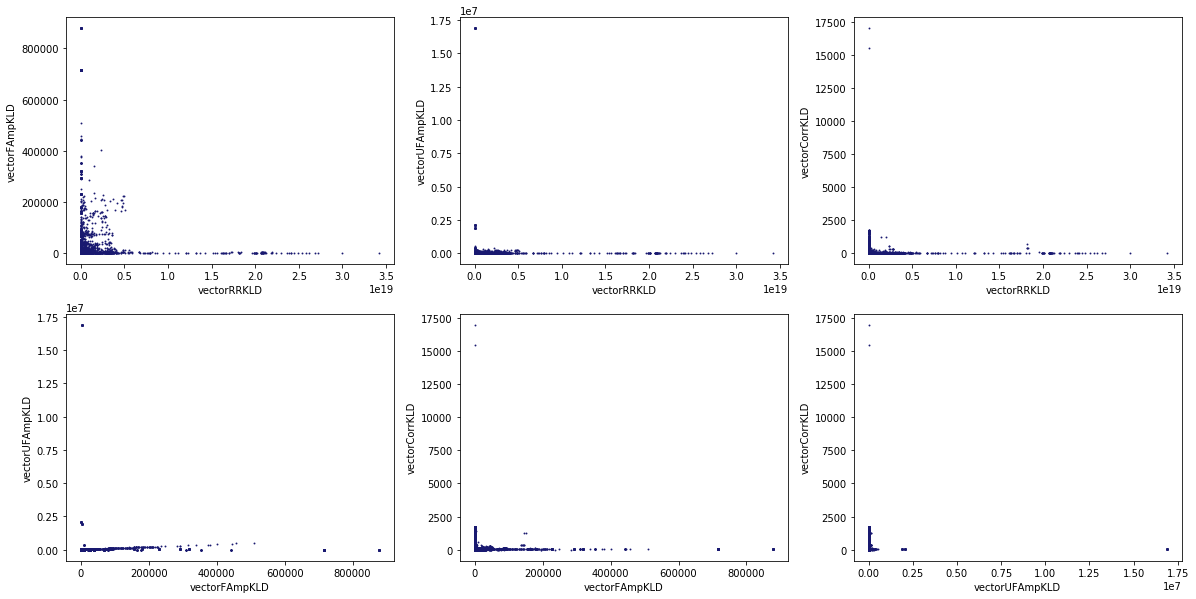

In [30]:
dp.printPCAScatter(df_h1, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

In [9]:
df_h2 = hp.convertDictInDF(hp.putDataInDict(
        [X_new2[:,0], X_new2[:,1], X_new2[:,2], X_new2[:,3]],
        ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD']))

In [10]:
z = np.abs(st.zscore(df_h2['vectorUFAmpKLD']))
z

array([0.0004562, 0.0004562, 0.0004562, ..., 0.0004562, 0.0004562,
       0.0004562])

In [24]:
len(z)

24025426

In [26]:
len(r)

24025421

In [18]:
#s = sorted(np.unique(z), reverse=True)
r = df_h2[(z < 1)]

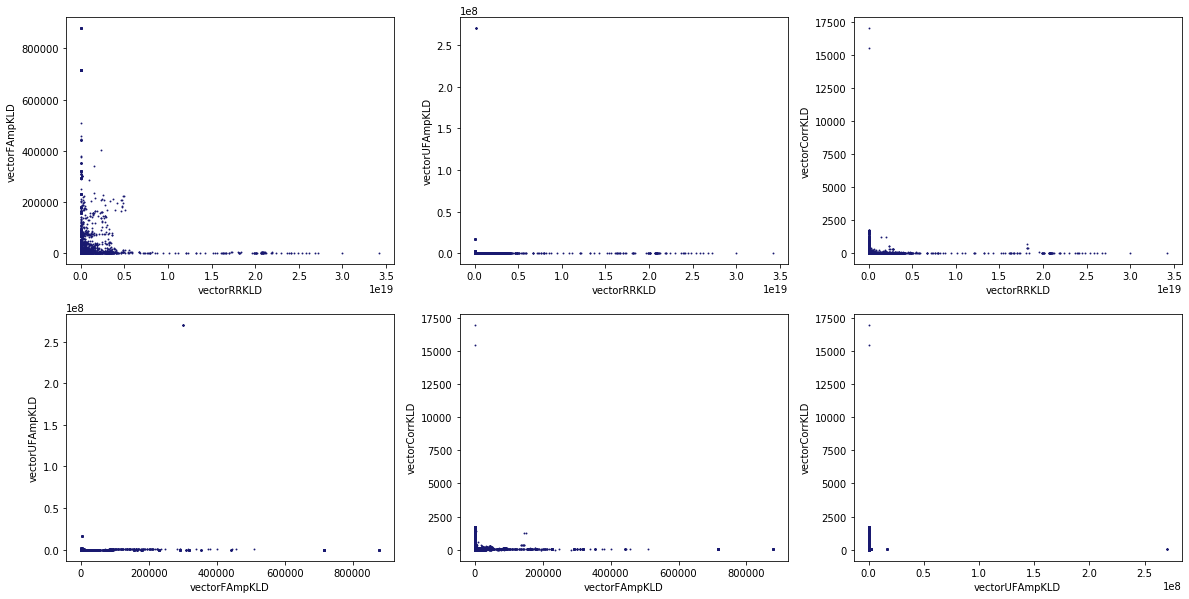

In [21]:
dp.printPCAScatter(r, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

In [20]:
df_DIV

,vectorRRKLD,vectorFAmpKLD,vectorUFAmpKLD,vectorCorrKLD
0,5.017200,6.079504,10.666752,4.587247
1,14.751816,5.707718,11.792542,6.084823
2,9.035200,4.921580,11.171261,6.249680
3,21.984138,130.787003,167.178040,8.120113
4,9.680495,5.966741,9.694817,3.728076
5,5.392751,3.009131,5.027657,2.018525
6,11.629895,40.500240,32.787529,7.712711
7,6.344516,6.092472,14.764872,8.672400
8,14.421295,161.334076,166.817230,5.483157
9,6.194016,2.300870,6.517097,4.216227


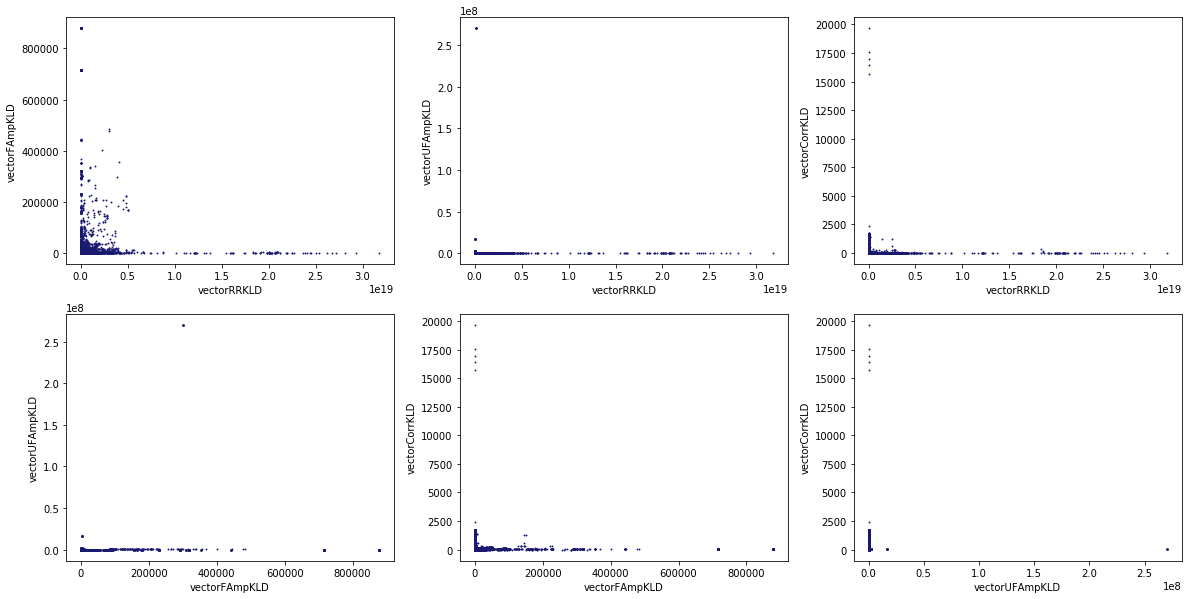

In [14]:
dp.printPCAScatter(df_h1, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

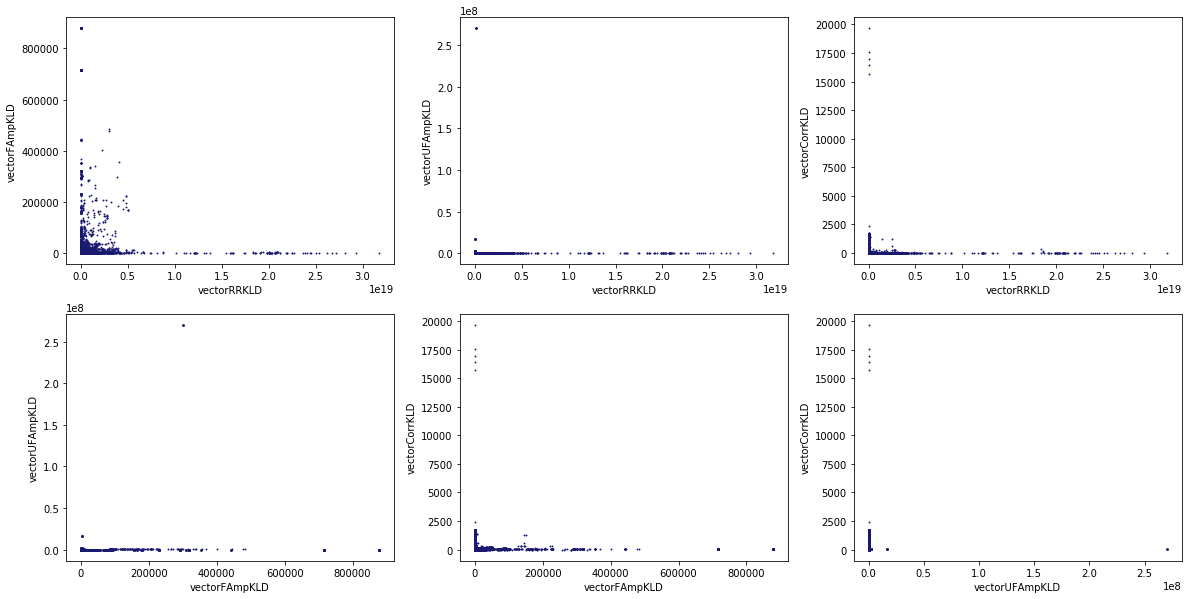

In [15]:
dp.printPCAScatter(df_h2, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

In [59]:
a = np.array([
 2.12325688e+05, 2.14779234e+05, 2.16310469e+05, 2.23426125e+05,
 2.23851531e+05, 2.26046297e+05, 2.62143750e+05,2.83744469e+05,
 2.84870875e+05, 2.95521438e+05, 3.06471656e+05, 3.96912438e+05,
 8.27540537e+07, 2.25228182e+08, 4.35543296e+19,2.25028073e+20])
def getBeforeCenter(main, n):
    t = (main < n)
    print(t)
    i = [ j for j, b in enumerate(t) if b ]
    print(i)
    v = main[t]
    return v[-1]
getBeforeCenter(a, 4.35543296e+19)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


225228182.0

In [23]:
df_h.describe()

,vectorRRKLD,vectorFAmpKLD,vectorUFAmpKLD,vectorCorrKLD
count,2.402382e+07,2.402382e+07,2.402382e+07,2.402382e+07
mean,3.738233e+09,1.704675e+02,8.275405e+07,1.119869e+01
std,8.799592e+11,2.963784e+03,1.813946e+11,2.850412e+01
min,-1.243643e+01,1.271403e-02,-6.254471e+00,0.000000e+00
25%,8.481710e+00,3.862693e+00,1.081231e+01,4.945657e+00
50%,1.087202e+01,5.340004e+00,1.411975e+01,7.263584e+00
75%,1.527049e+01,7.921535e+00,2.049725e+01,1.119980e+01
max,9.527247e+14,8.780618e+05,3.976129e+14,1.727686e+04


In [24]:
df_DIV.describe()

,vectorRRKLD,vectorFAmpKLD,vectorUFAmpKLD,vectorCorrKLD
count,2.402561e+07,2.402561e+07,2.402561e+07,2.402561e+07
mean,1.438852e+14,1.720208e+02,3.976130e+14,1.119978e+01
std,inf,3.000600e+03,inf,2.850847e+01
min,-1.243643e+01,1.271403e-02,-6.254471e+00,0.000000e+00
25%,8.481899e+00,3.862787e+00,1.081256e+01,4.945729e+00
50%,1.087247e+01,5.340265e+00,1.412031e+01,7.263819e+00
75%,1.527171e+01,7.922556e+00,2.049992e+01,1.119980e+01
max,3.421422e+19,8.780618e+05,2.250281e+20,1.727686e+04


In [32]:
def removeOutliersV2(df, threshold = 2, threshold_hard = 0.01, cols_hard = [0, 2], samples_bandwidth = 50000):
    initial_shape = df.shape
    X = df.to_numpy().astype(np.float64)
    bandwidth = estimate_bandwidth(X, n_samples=samples_bandwidth, quantile=0.5)
    ms, n_clusters_, cluster_centers, labels = cl.meanClustering(X, bandwidth)
    X = removeOuliersFromMeanShiftV2(cols_hard, X, threshold_hard, cluster_centers, bandwidth)
    df_h = hp.convertDictInDF(hp.putDataInDict(
        [X[:,0], X[:,1], X[:,2], X[:,3]],
        ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD']))
    df_2 = df_h.copy()
    zCorrKLD = np.abs(st.zscore(df_h['vectorCorrKLD']))
    zFAmpKLD = np.abs(st.zscore(df_h['vectorFAmpKLD']))
    toMaintain_CorrKLD = zCorrKLD <= threshold
    toMaintain_FAmpKLD = zFAmpKLD <= threshold
    toMaintain = np.logical_and(toMaintain_CorrKLD, toMaintain_FAmpKLD)
    df_2 = df_2[toMaintain]
    df_nout = df_2.copy()
    print(f'after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : {df_2.shape} && { str( round(100 * df_2.shape[0]/initial_shape[0], 2) ) }')
    print(f'after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : {df_h.shape} && { str( round(100 * df_h.shape[0]/initial_shape[0], 2) ) }')
    del toMaintain_CorrKLD, toMaintain_FAmpKLD, toMaintain, zCorrKLD, zFAmpKLD, df_2, df_h, X, ms, n_clusters_, cluster_centers, labels
    gc.collect()
    return df_nout

In [33]:
dfn = removeOutliersV2(df_DIV, 20, 0.01, [0,2], 50000)

number of estimated clusters : 856
centers [4.35032009e+09 7.28571576e+12 1.82037135e+13 4.11266460e+15
 7.05930837e+15 8.77214528e+15 1.11883435e+16 1.29530857e+16
 1.64329450e+16 1.76854381e+16 2.16278071e+16 2.37421416e+16
 2.87007290e+16 2.97609356e+16 3.21774027e+16 3.38701393e+16
 3.52817577e+16 3.74368462e+16 4.00505818e+16 4.12718577e+16
 4.31451140e+16 4.46339369e+16 4.63158879e+16 4.82731586e+16
 5.04209232e+16 5.23885186e+16 5.64439004e+16 6.08449677e+16
 6.31360719e+16 6.58626492e+16 6.81891932e+16 7.06765344e+16
 7.55960372e+16 7.75168089e+16 7.96759619e+16 8.17940623e+16
 8.58239054e+16 9.07098267e+16 9.50268891e+16 9.81365839e+16
 1.00643616e+17 1.03685276e+17 1.05077538e+17 1.07845034e+17
 1.10838825e+17 1.13984236e+17 1.16029827e+17 1.17512155e+17
 1.20767829e+17 1.24058679e+17 1.27625446e+17 1.31490352e+17
 1.33727372e+17 1.35722357e+17 1.37956141e+17 1.41040318e+17
 1.43507021e+17 1.45894881e+17 1.48136738e+17 1.51373685e+17
 1.53034858e+17 1.56028166e+17 1.58484452e

importance [24023933, 24023933, 24023935, 22, 10, 14, 12, 10, 3, 4, 6, 10, 12, 10, 4, 3, 7, 4, 4, 5, 9, 4, 5, 12, 4, 2, 9, 3, 4, 3, 4, 4, 3, 4, 4, 11, 7, 3, 8, 3, 5, 4, 7, 14, 10, 4, 5, 3, 7, 2, 3, 6, 3, 8, 4, 1, 6, 4, 1, 7, 7, 5, 4, 1, 6, 6, 1, 4, 3, 4, 1, 3, 3, 2, 2, 3, 4, 2, 3, 4, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 7, 2, 3, 2, 1, 3, 1, 1, 2, 2, 3, 1, 2, 2, 1, 1, 4, 2, 1, 1, 1, 2, 6, 5, 2, 2, 1, 1, 3, 1, 1, 2, 4, 1, 3, 1, 1, 2, 1, 2, 6, 1, 1, 3, 3, 2, 1, 1, 4, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 4, 2, 3, 1, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2, 2, 2, 7, 1, 1, 2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 5, 1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 3, 1, 1, 3, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 4, 1, 1, 4, 5, 1, 1, 1, 6, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 4, 2, 1, 4, 3, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 3, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 4, 2, 1, 1, 4

importance [24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426, 24025426

after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (24002170, 4) && 99.9
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (24023136, 4) && 99.99


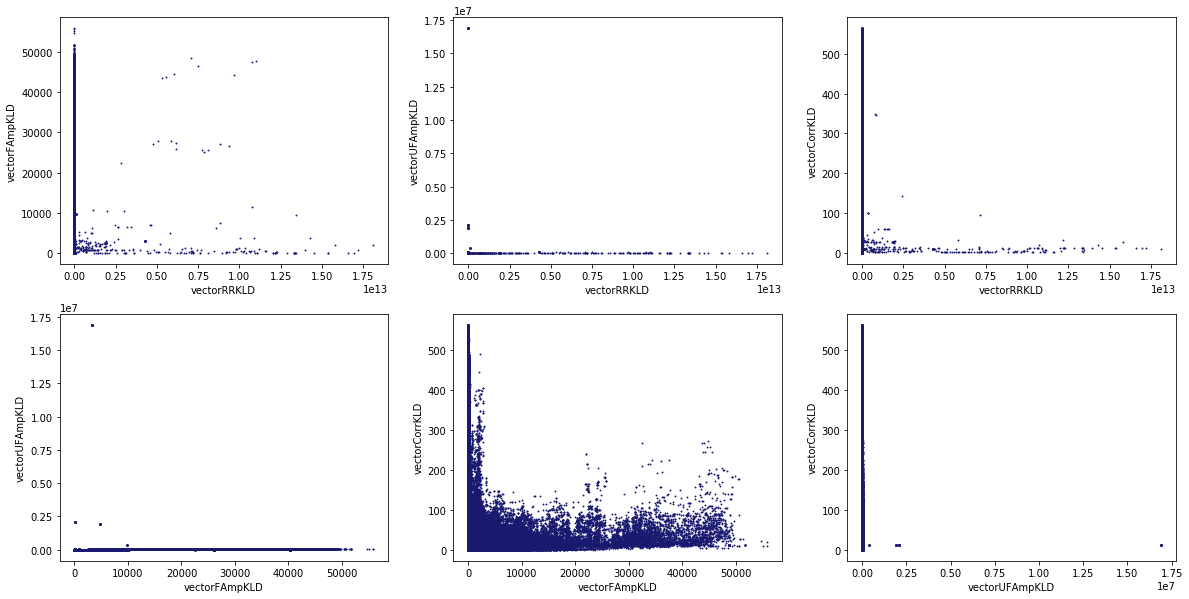

In [34]:
dp.printPCAScatter(dfn, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

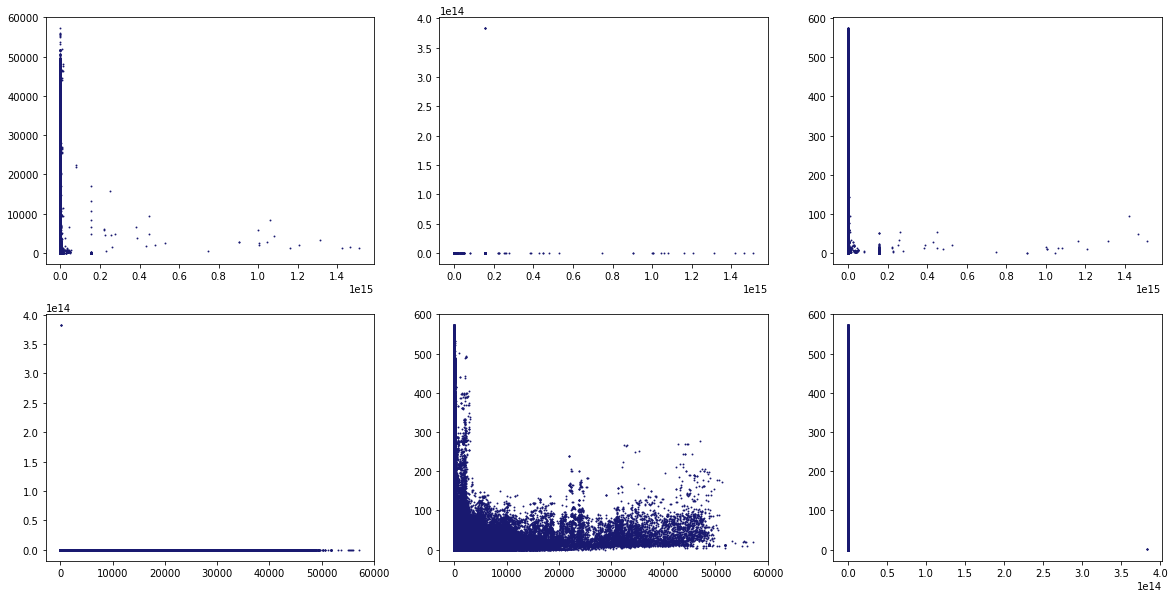

In [8]:
dp.printPCAScatter(dfn, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

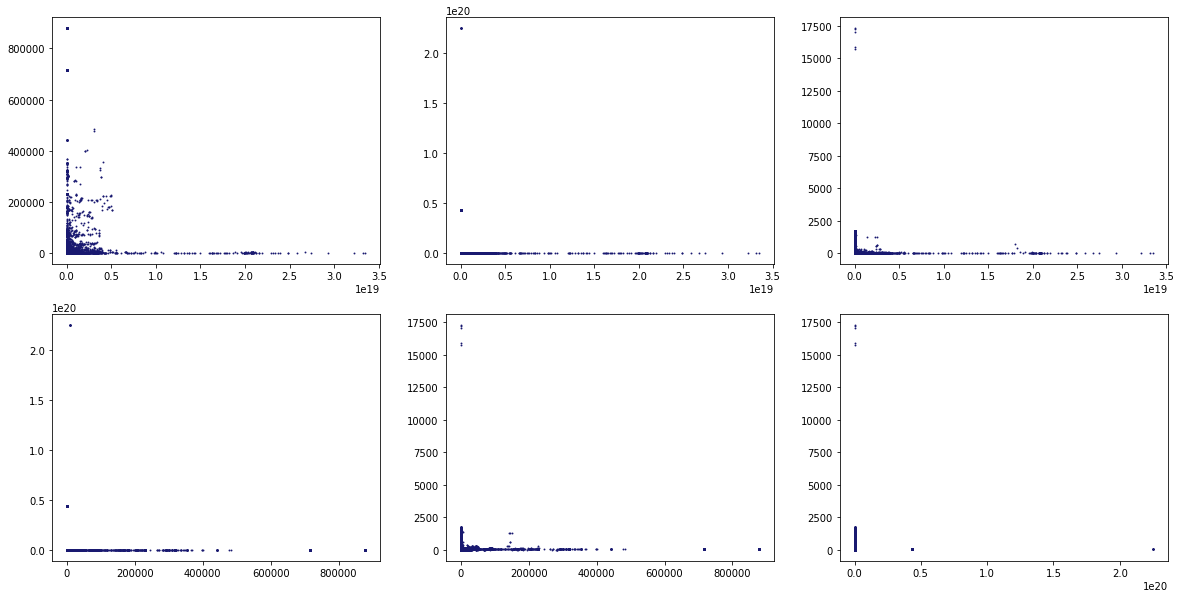

In [9]:
dp.printPCAScatter(df_DIV, ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

number of estimated clusters : 989
to maintain (array([0, 1, 2]),)
to maintain (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165,

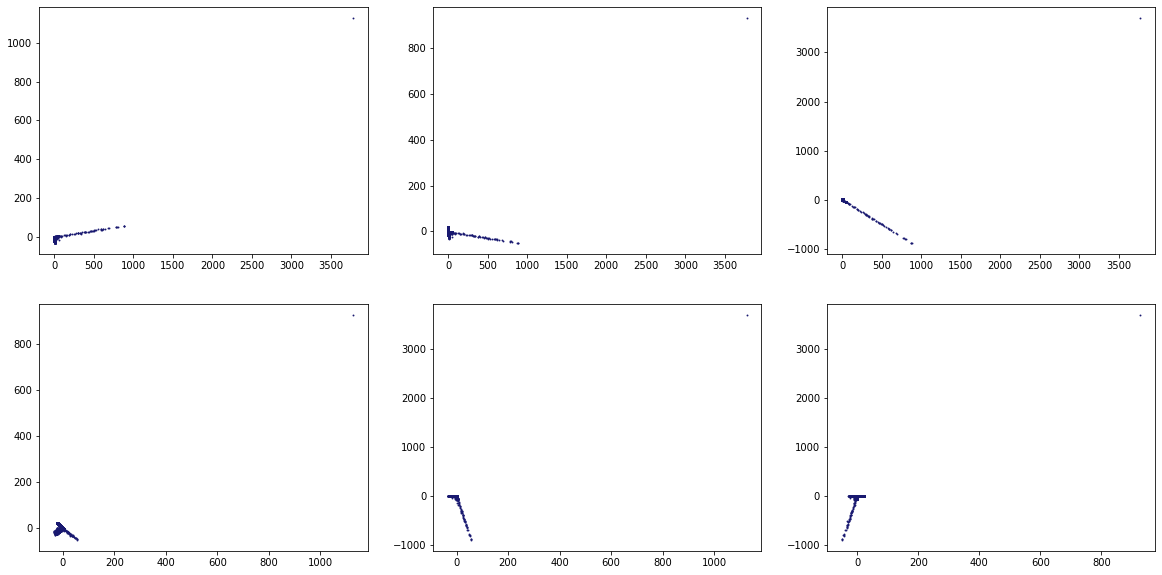

10631

In [8]:
df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCAV2(df_DIV, 20, 0.01, [0,2], 50000)
del df_nout, Xnorm ; gc.collect()
dp.printPCAScatter(dfPca, titPca)
del dfPca; gc.collect()

In [6]:
len(df_DIV) - df_DIV.count()

vectorRRKLD       0
vectorFAmpKLD     0
vectorUFAmpKLD    0
vectorCorrKLD     0
dtype: int64

In [16]:
importlib.reload(dp)

<module 'display' from '/homes/v18porti/Documents/code/imt_stg/display.py'>

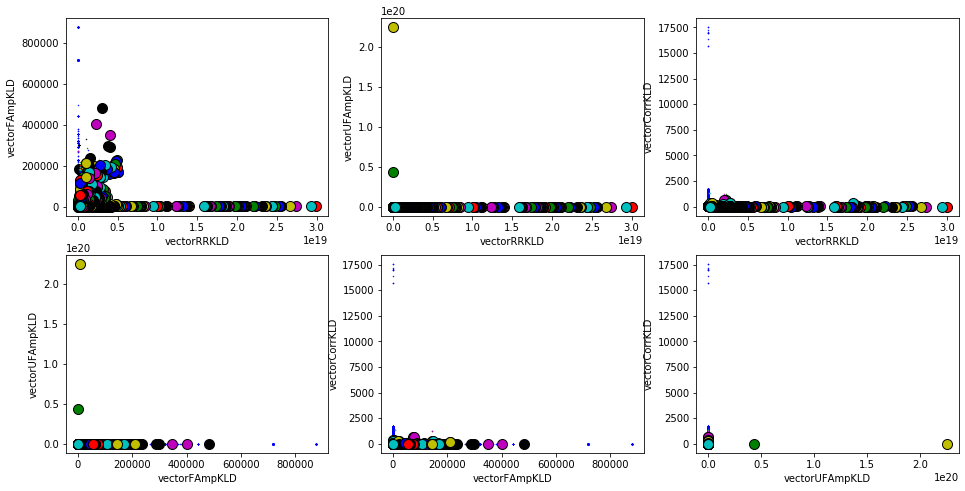

In [17]:
dp.printMultiDimensionMSh(X, ms, n_clusters_, cluster_centers, labels, 
                          ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD'])

In [10]:
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
cluster_centers.shape

(844, 4)

In [12]:
cluster_centers

array([[3.69857526e+09, 1.70467304e+02, 5.23064117e+01, 1.11986883e+01],
       [7.28571576e+12, 6.84630966e+01, 5.28744926e+01, 1.11998043e+01],
       [1.82037135e+13, 2.69928857e+03, 5.40924454e+01, 1.11998043e+01],
       ...,
       [2.89559070e+19, 8.36521387e+03, 2.25228182e+08, 9.84532547e+00],
       [2.93475882e+19, 1.62481470e+03, 4.35543296e+19, 2.87424526e+01],
       [3.42142224e+19, 4.71673926e+03, 2.25028073e+20, 4.37088013e+00]])

In [11]:
max_vals = np.amax(cluster_centers, axis=0)
max_vals

array([3.10771706e+19, 3.99556797e+05, 2.25028073e+20, 1.23757764e+03])

In [12]:
#result = np.where(cluster_centers == np.amax(cluster_centers))
results = [ np.where(cluster_centers == m) for m in max_vals]
results

[(array([395]), array([0])),
 (array([253]), array([1])),
 (array([9]), array([2])),
 (array([715, 755]), array([3, 3]))]

In [13]:
listOfCordinates = list(zip(results[0], results[1]))
# travese over the list of cordinates
for cord in listOfCordinates:
    print(cord)

(array([395]), array([253]))
(array([0]), array([1]))


In [16]:
centerRRKLD = max_vals[0]

In [17]:
np.where(np.logical_and(X[:,0]>=centerRRKLD - bandwidth, X[:,0]<=centerRRKLD + bandwidth))

(array([24874736]),)

In [18]:
X[:,0].shape

(30032015,)

In [38]:
bandwidth

1058061643518766.0

In [14]:
bandwidth

1058061643518774.0

In [20]:
X[:,0][4394145]

10.348309516906738

In [21]:
result

NameError: name 'result' is not defined

In [13]:
centers = cluster_centers[:,2]

In [14]:
centers.sort()

In [15]:
centers

array([5.23064117e+01, 5.28744926e+01, 5.40924454e+01, 5.75319405e+01,
       5.76318512e+01, 5.91722641e+01, 7.38601990e+01, 7.52807083e+01,
       8.26268616e+01, 8.72852631e+01, 8.89448090e+01, 9.06408386e+01,
       9.20451813e+01, 9.88978577e+01, 9.98583984e+01, 1.04250710e+02,
       1.04385658e+02, 1.08346176e+02, 1.12668808e+02, 1.21590515e+02,
       1.27251060e+02, 1.31964188e+02, 1.35352219e+02, 1.41492157e+02,
       1.83336990e+02, 1.88079247e+02, 2.11744720e+02, 2.16722488e+02,
       2.21505936e+02, 2.22000351e+02, 2.22347427e+02, 2.22405243e+02,
       2.26234192e+02, 2.42630058e+02, 2.60892303e+02, 2.75344666e+02,
       2.80191986e+02, 2.82259430e+02, 2.91246368e+02, 2.99947872e+02,
       3.04658691e+02, 3.05152985e+02, 3.18565857e+02, 3.19861450e+02,
       3.24614868e+02, 3.30432770e+02, 3.39053802e+02, 3.42600739e+02,
       3.55844879e+02, 3.56758911e+02, 3.93957520e+02, 3.96064941e+02,
       4.02206352e+02, 4.17698822e+02, 4.23522614e+02, 4.32683929e+02,
      

In [18]:
def getImportance(col, center, bandwidth):
    return np.where(np.logical_and(col>=center - bandwidth, col<=center + bandwidth))[0].shape[0]

In [27]:
importance = getImportance(X[:,0], centerRRKLD, bandwidth)

In [69]:
importance = [ getImportance(X[:,2], c, bandwidth) for c in centers ]

In [70]:
importance

[30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,
 30031796,

In [31]:
importance[-1]

14

In [76]:
total = X.shape[0]
total

30032015

In [72]:
z = [ v / total for i, v in enumerate(importance) ]

In [73]:
z = np.array(z)

In [77]:
#z = np.abs(st.zscore(importance))
#z = [ v / total for i, v in enumerate(importance) ]
threshold = 0.01
print(np.where(z > threshold))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [75]:
z 

array([9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
       9.99992708e-01, 9.99992708e-01, 9.99992708e-01, 9.99992708e-01,
      

In [78]:
to_remove_centers = centers[(z <= threshold)]
to_remove_centers

array([4.35543296e+19, 2.25028073e+20])

In [43]:
extremes = [ to_remove_centers[0] - bandwidth, to_remove_centers[-1] + bandwidth ]
extremes

[-1058061643518710.4, 1058061823704544.2]

In [44]:
removing = np.where(np.logical_and(X[:,0]>=extremes[0], X[:,0]<=extremes[1]))
removing

(array([       0,        1,        2, ..., 30032012, 30032013, 30032014]),)

In [45]:
np.concatenate(([], removing[0]))

array([0.0000000e+00, 1.0000000e+00, 2.0000000e+00, ..., 3.0032012e+07,
       3.0032013e+07, 3.0032014e+07])

In [46]:
removing[0].shape

(30030030,)

In [124]:
Xnew = np.delete(X, removing[0], 0)
Xnew.shape

(30030065, 4)

In [79]:
def getImportance(col, center, bandwidth):
    return np.where(np.logical_and(col>=center - bandwidth, col<=center + bandwidth))[0].shape[0]

def removeOuliersFromMeanShift(cols, X, threshold, cluster_centers):
    indexes = []
    for col in cols:
        centers = cluster_centers[:, col]
        centers.sort()
        importance = [ getImportance(X[:, col], c, bandwidth) for c in centers ]
        #z = np.abs(st.zscore(importance))
        z = np.array([ v / total for i, v in enumerate(importance) ])
        print('to maintain', np.where(z > threshold))
        to_remove_centers = centers[(z <= threshold)]
        extremes = [ to_remove_centers[0] - bandwidth, to_remove_centers[-1] + bandwidth ]
        removing_indexes = np.where(np.logical_and(X[:, col]>=extremes[0], X[:, col]<=extremes[1]))[0]
        indexes = np.concatenate((indexes, removing_indexes))
    to_remove = np.unique(indexes)
    return np.delete(X, to_remove, 0)

Xnew = removeOuliersFromMeanShift([0, 2], X, 0.01, cluster_centers)

to maintain (array([0, 1, 2]),)
to maintain (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 17

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [80]:
Xnew.shape

(30029855, 4)

In [126]:
print(Xnew.shape)

(232, 4)


0           23.335548
1            8.784712
2            9.331572
3            9.858690
4            9.357141
              ...    
30032010    10.612747
30032011     9.090787
30032012     5.518223
30032013     8.549894
30032014     9.349419
Name: vectorRRKLD, Length: 30032015, dtype: float32

In [ ]:
bayesian_estimators = [
    ("Finite mixture with a Dirichlet distribution prior=", BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        #reg_covar=0, init_params='random',
        max_iter=100, #mean_precision_prior=.8,
        random_state=2)),
    ("Infinite mixture with a Dirichlet process prior=",
     BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_process",
        #reg_covar=0, init_params='random',
        max_iter=100, #mean_precision_prior=.8,
        random_state=2))]
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])


------------- shape: (26428173, 4) -----------------
 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (26405518, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (26380371, 4) && 99.82
variance ratio: [0.4026226  0.33524285 0.16458403 0.09755052]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 1, initp: kmeans ) ----------------- 



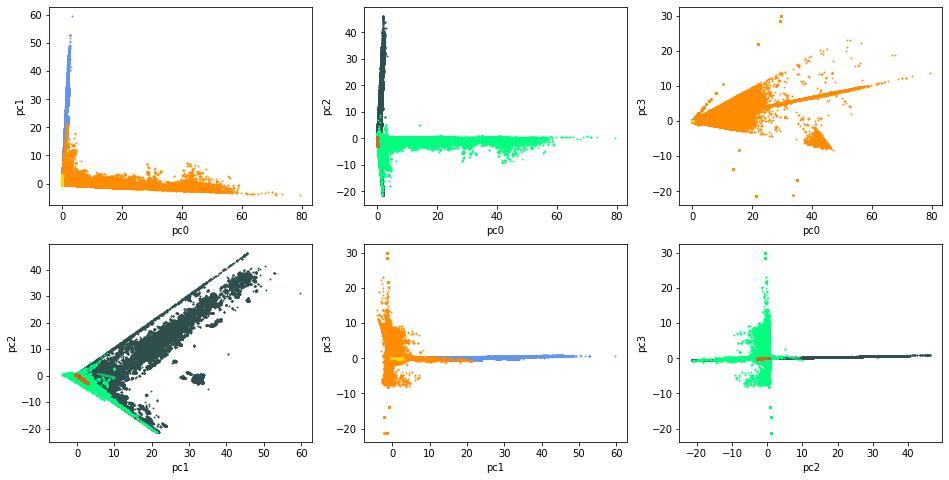

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 20159758, 'representativeness': 0.7641953936129253}, {'group': 1, 'qty': 1563723, 'representativeness': 0.059276004874988304}, {'group': 2, 'qty': 471397, 'representativeness': 0.017869233150663424}, {'group': 3, 'qty': 328574, 'representativeness': 0.01245524560666717}, {'group': 4, 'qty': 3856919, 'representativeness': 0.1462041227547558}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 1, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


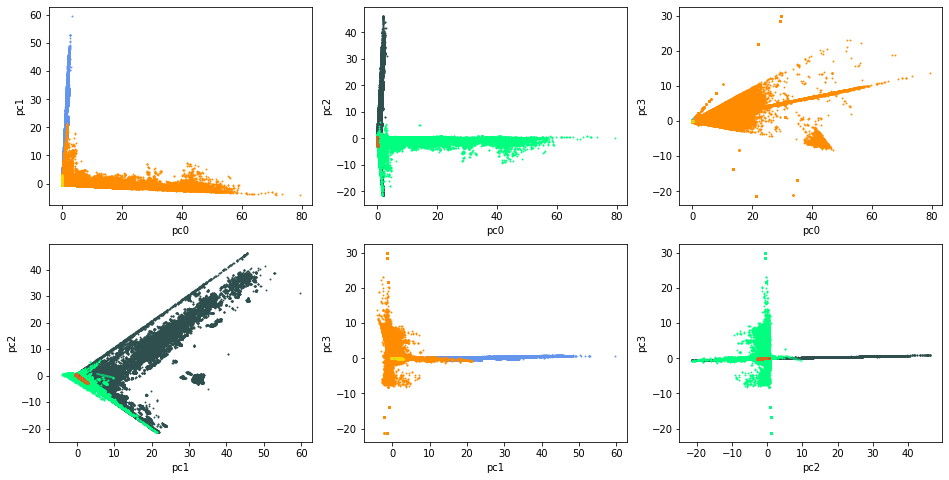

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 20027450, 'representativeness': 0.759179997885549}, {'group': 1, 'qty': 1617476, 'representativeness': 0.06131361837178105}, {'group': 2, 'qty': 444068, 'representativeness': 0.016833273497177125}, {'group': 3, 'qty': 349741, 'representativeness': 0.013257622495149897}, {'group': 4, 'qty': 3941636, 'representativeness': 0.14941548775034286}]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 2, initp: kmeans ) ----------------- 



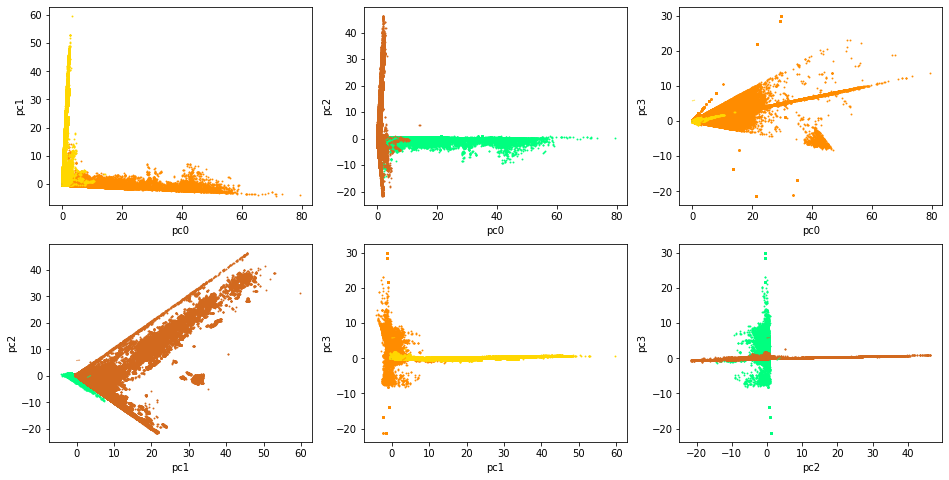

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 2334393, 'representativeness': 0.08848977142891584}, {'group': 1, 'qty': 3047857, 'representativeness': 0.11553503170975116}, {'group': 2, 'qty': 19550434, 'representativeness': 0.7410977654559899}, {'group': 3, 'qty': 1096749, 'representativeness': 0.041574434264021534}, {'group': 4, 'qty': 350938, 'representativeness': 0.013302997141321478}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 2, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


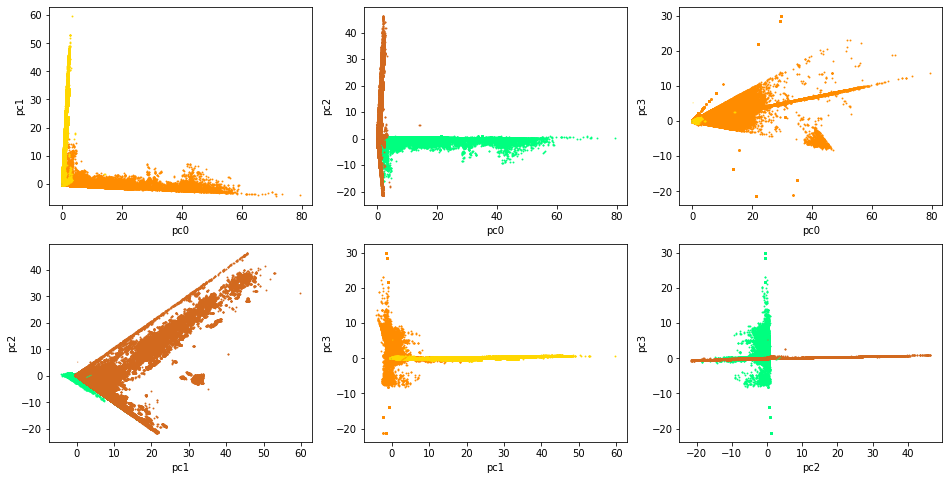

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 2}
[{'group': 0, 'qty': 2277161, 'representativeness': 0.08632027957453668}, {'group': 1, 'qty': 4571598, 'representativeness': 0.17329544000726904}, {'group': 2, 'qty': 17968806, 'representativeness': 0.6811430362370567}, {'group': 3, 'qty': 1113440, 'representativeness': 0.04220713954326116}, {'group': 4, 'qty': 449366, 'representativeness': 0.017034104637876395}]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 1, initp: random ) ----------------- 



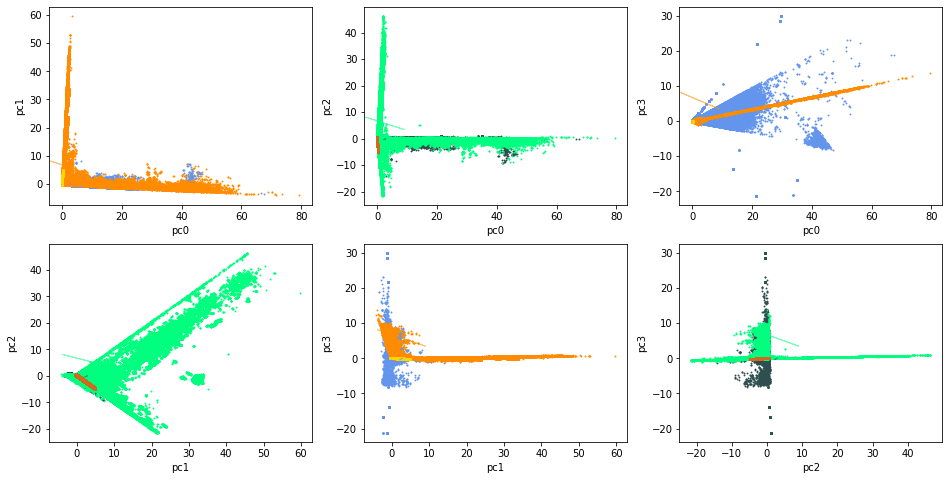

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 1531904, 'representativeness': 0.05806984291464286}, {'group': 1, 'qty': 20367111, 'representativeness': 0.7720555180971488}, {'group': 2, 'qty': 1141114, 'representativeness': 0.04325617710228564}, {'group': 3, 'qty': 328316, 'representativeness': 0.01244546560774297}, {'group': 4, 'qty': 3011926, 'representativeness': 0.11417299627817971}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 1, initp: random )----------------- 



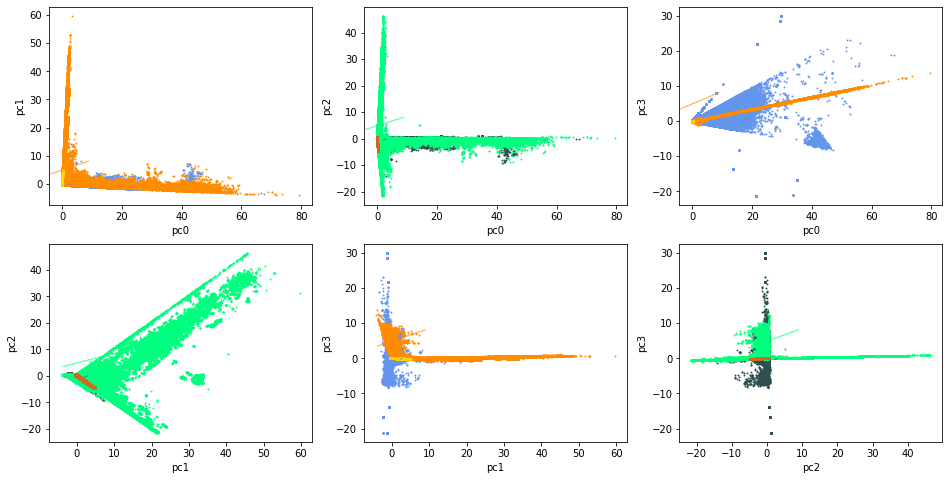

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 1495273, 'representativeness': 0.056681272602269316}, {'group': 1, 'qty': 20393871, 'representativeness': 0.7730699086832403}, {'group': 2, 'qty': 1125139, 'representativeness': 0.04265061321540929}, {'group': 3, 'qty': 330286, 'representativeness': 0.012520142343714574}, {'group': 4, 'qty': 3035802, 'representativeness': 0.11507806315536655}]

 -> GAUSSIAN MIXTURE (comp: 5, ranst: 2, initp: random ) ----------------- 



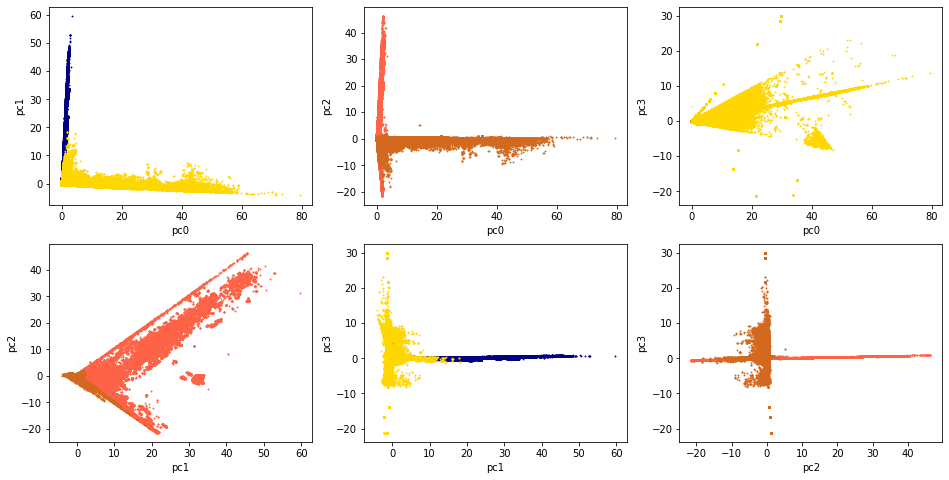

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 2}
[{'group': 0, 'qty': 611653, 'representativeness': 0.023185913496061143}, {'group': 1, 'qty': 15535653, 'representativeness': 0.5889095721966913}, {'group': 2, 'qty': 2252233, 'representativeness': 0.08537533456220157}, {'group': 3, 'qty': 6856931, 'representativeness': 0.25992549536168386}, {'group': 4, 'qty': 1123901, 'representativeness': 0.04260368438336216}]

 -> BAYESIAN MIXTURE (comp: 5, ranst: 2, initp: random )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


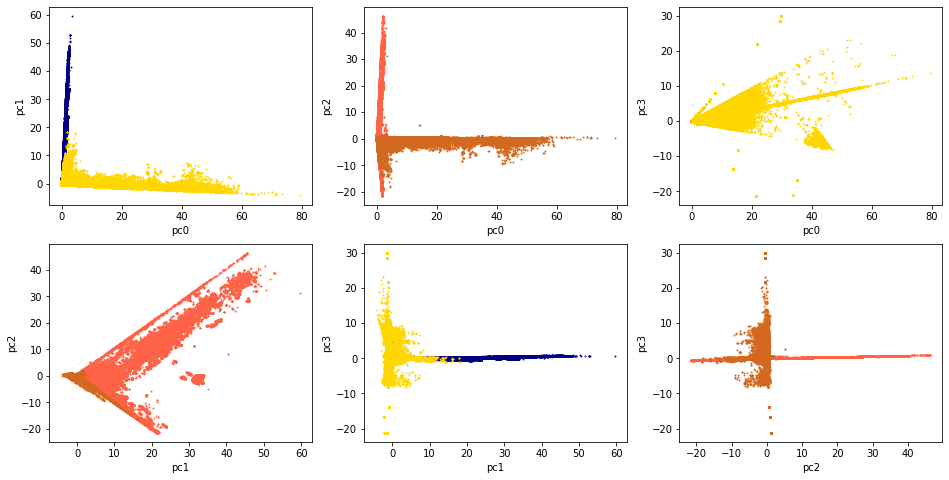

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 2}
[{'group': 0, 'qty': 533329, 'representativeness': 0.020216887776142344}, {'group': 1, 'qty': 16683867, 'representativeness': 0.6324348888042552}, {'group': 2, 'qty': 2252159, 'representativeness': 0.08537252944623107}, {'group': 3, 'qty': 5790678, 'representativeness': 0.21950707213329182}, {'group': 4, 'qty': 1120338, 'representativeness': 0.042468621840079504}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 1, initp: kmeans ) ----------------- 



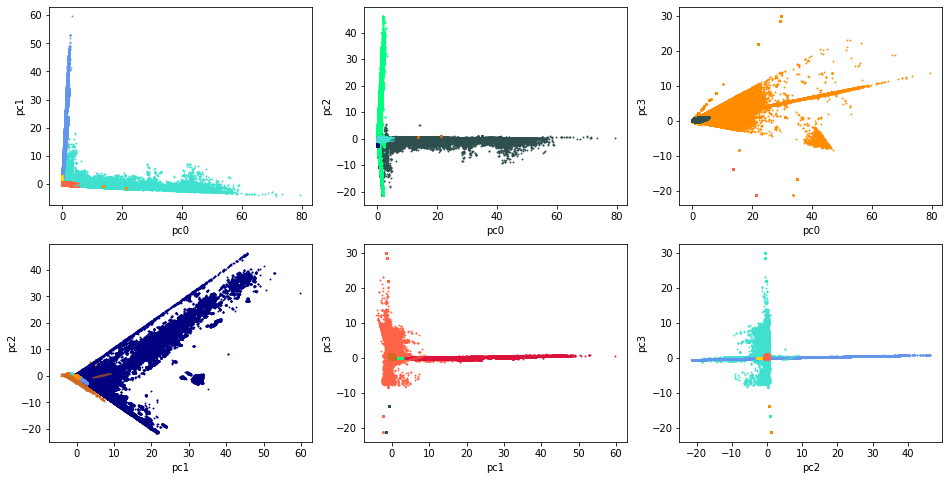

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 20101296, 'representativeness': 0.7619792761822797}, {'group': 1, 'qty': 339483, 'representativeness': 0.012868772770481507}, {'group': 2, 'qty': 466719, 'representativeness': 0.01769190433296029}, {'group': 3, 'qty': 22290, 'representativeness': 0.0008449464186838009}, {'group': 4, 'qty': 3883445, 'representativeness': 0.14720964310926485}, {'group': 5, 'qty': 1567138, 'representativeness': 0.05940545718632994}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 1, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


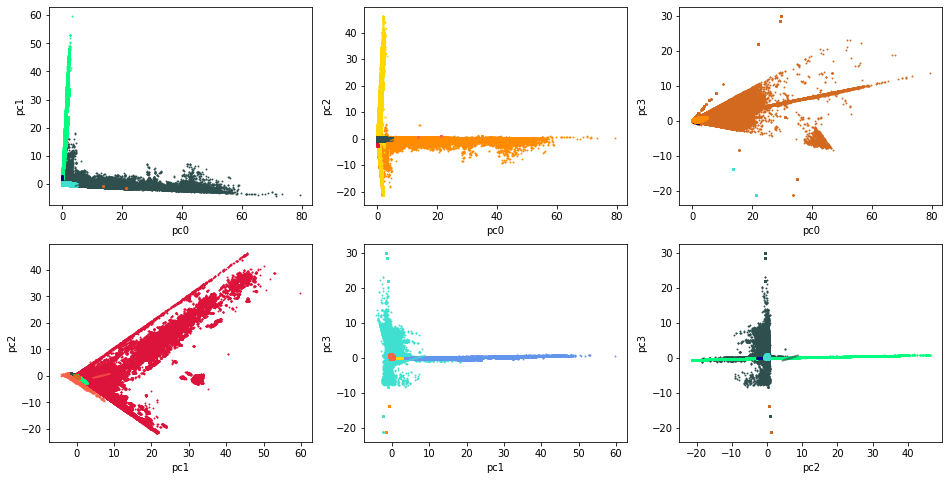

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 20005203, 'representativeness': 0.758336681466686}, {'group': 1, 'qty': 352191, 'representativeness': 0.013350494577957225}, {'group': 2, 'qty': 444256, 'representativeness': 0.016840400008021117}, {'group': 3, 'qty': 22290, 'representativeness': 0.0008449464186838009}, {'group': 4, 'qty': 3951305, 'representativeness': 0.14978201026816493}, {'group': 5, 'qty': 1605126, 'representativeness': 0.06084546726048697}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 2, initp: kmeans ) ----------------- 



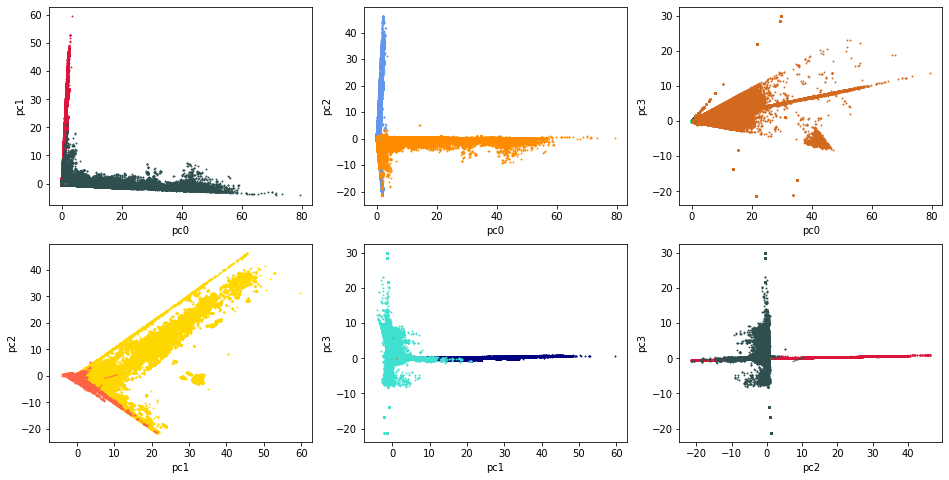

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 2300104, 'representativeness': 0.08718997924631158}, {'group': 1, 'qty': 3407628, 'representativeness': 0.1291728611398225}, {'group': 2, 'qty': 19065327, 'representativeness': 0.7227088277113313}, {'group': 3, 'qty': 962483, 'representativeness': 0.036484816684344584}, {'group': 4, 'qty': 389216, 'representativeness': 0.01475400023752509}, {'group': 5, 'qty': 255613, 'representativeness': 0.00968951498066498}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 2, initp: kmeans )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


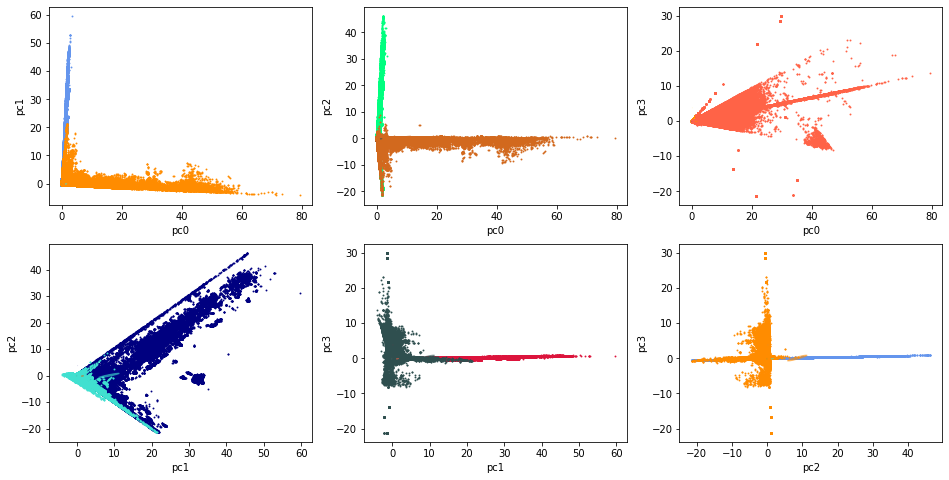

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 2229160, 'representativeness': 0.084500706983992}, {'group': 1, 'qty': 6717173, 'representativeness': 0.2546276926886282}, {'group': 2, 'qty': 15537580, 'representativeness': 0.5889826189328421}, {'group': 3, 'qty': 978462, 'representativeness': 0.03709053219911122}, {'group': 4, 'qty': 661406, 'representativeness': 0.025071899102556215}, {'group': 5, 'qty': 256590, 'representativeness': 0.009726550092870188}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 1, initp: random ) ----------------- 



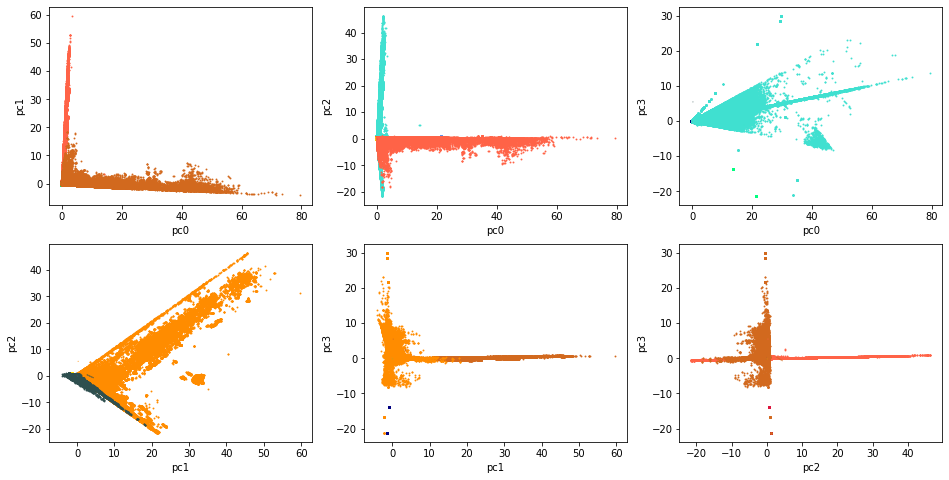

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 1944667, 'representativeness': 0.0737164386353778}, {'group': 1, 'qty': 418236, 'representativeness': 0.01585406058163473}, {'group': 2, 'qty': 22290, 'representativeness': 0.0008449464186838009}, {'group': 3, 'qty': 4371621, 'representativeness': 0.16571491735275445}, {'group': 4, 'qty': 18816903, 'representativeness': 0.7132918259565038}, {'group': 5, 'qty': 806654, 'representativeness': 0.030577811055045437}]

 -> BAYESIAN MIXTURE (comp: 6, ranst: 1, initp: random )----------------- 



/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


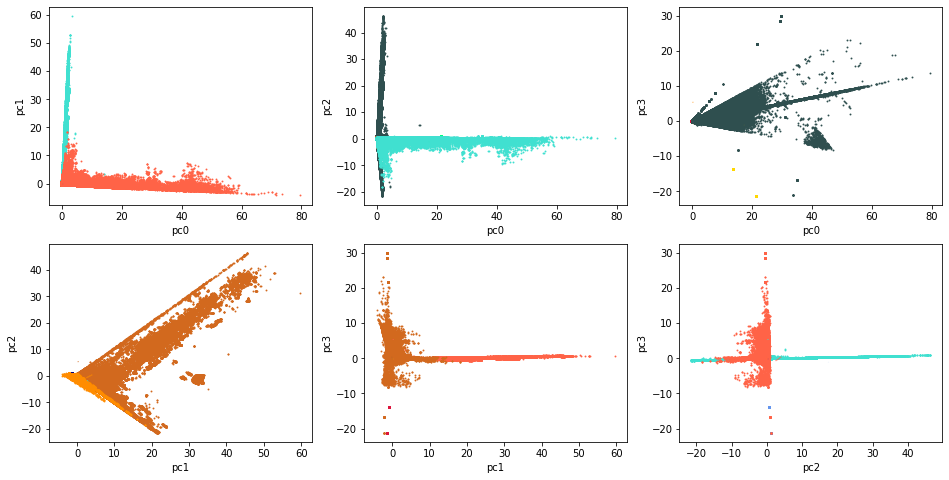

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 1383603, 'representativeness': 0.05244820097488394}, {'group': 1, 'qty': 405915, 'representativeness': 0.015387008772545315}, {'group': 2, 'qty': 22290, 'representativeness': 0.0008449464186838009}, {'group': 3, 'qty': 3702699, 'representativeness': 0.1403581094443289}, {'group': 4, 'qty': 20050899, 'representativeness': 0.7600688784854466}, {'group': 5, 'qty': 814965, 'representativeness': 0.030892855904111432}]

 -> GAUSSIAN MIXTURE (comp: 6, ranst: 2, initp: random ) ----------------- 



In [ ]:
df_DIV = hp.getRandomRows(df_ALL, 0.22)
del df_ALL; gc.collect()
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')

df_DIV = cl.cleanData(df_DIV, 'mean')
UFAMP_limit = 1e+6
threshold = 20
RRKLD_limit = pow(10, 4*(0+1)) * 2
print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')

df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_DIV, threshold, UFAMP_limit, RRKLD_limit)
del df_nout, Xnorm ; gc.collect()
if printPCA: dp.printPCAScatter(dfPca, titPca)
del dfPca; gc.collect()

init_params = ['kmeans', 'random']
random_state = [1, 2]
bic = []
for comp in range(5, 10):
    for k, ip in enumerate(init_params):
        for j, rs in enumerate(random_state):
            
            print(f'\n -> GAUSSIAN MIXTURE (comp: {comp}, ranst: {rs}, initp: {ip} ) ----------------- \n')
            gmm = GaussianMixture(n_components=comp, covariance_type='full', random_state=rs, init_params=ip).fit(Xpca)
            dp.printPCAGMM(gmm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(gmm, Xpca, gmm.predict(Xpca)))
            bic.append(gmm.bic(Xpca))
            del gmm; gc.collect()
    
            print(f'\n -> BAYESIAN MIXTURE (comp: {comp}, ranst: {rs}, initp: {ip} )----------------- \n')
            bgm = BayesianGaussianMixture(n_components=comp, random_state=rs, init_params=ip).fit(Xpca)
            dp.printPCAGMM(bgm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(bgm, Xpca, bgm.predict(Xpca)))
            del bgm; gc.collect()
            
print(np.array(bic)); 
del Xpca, bic, titPca; gc.collect();
del df_DIV; gc.collect()